# SIR-Modell

In diesem Notebook werden wir das SIR-Modell (Susceptible, Infected, Recovered) betrachten, ein klassisches epidemiologisches Modell, das die Ausbreitung einer ansteckenden Krankheit innerhalb einer geschlossenen Population beschreibt. Das Modell teilt die Population in drei Hauptkategorien auf: anfällige Individuen (S), infizierte Individuen (I) und genesene Individuen (R). Diese Kategorien repräsentieren jeweils den Anteil der Bevölkerung, der anfällig für die Infektion, aktuell infiziert und von der Krankheit genesen (und damit immun) ist.

Die Dynamik der Ausbreitung wird durch ein System von Differentialgleichungen modelliert, das die Raten der Übergänge zwischen diesen Kategorien beschreibt. Zwei Hauptparameter steuern die Dynamik: die Übertragungsrate β und die Genesungsrate γ. Die Übertragungsrate bestimmt, wie schnell die Krankheit von infizierten zu anfälligen Individuen übertragen wird, während die Genesungsrate angibt, wie schnell Infizierte genesen.

Solche Modelle und ihre Erweiterungen helfen öffentliche Gesundheitsinterventionen zu planen und die Auswirkungen von Krankheitsausbrüchen abzuschätzen.

Die folgende Zelle kann ausgeführt werden. Hier sind zwei feste Werte für die Übertragungs- und die Genesungsrate angegeben. Mit diesen Werten kann experimentiert werden.

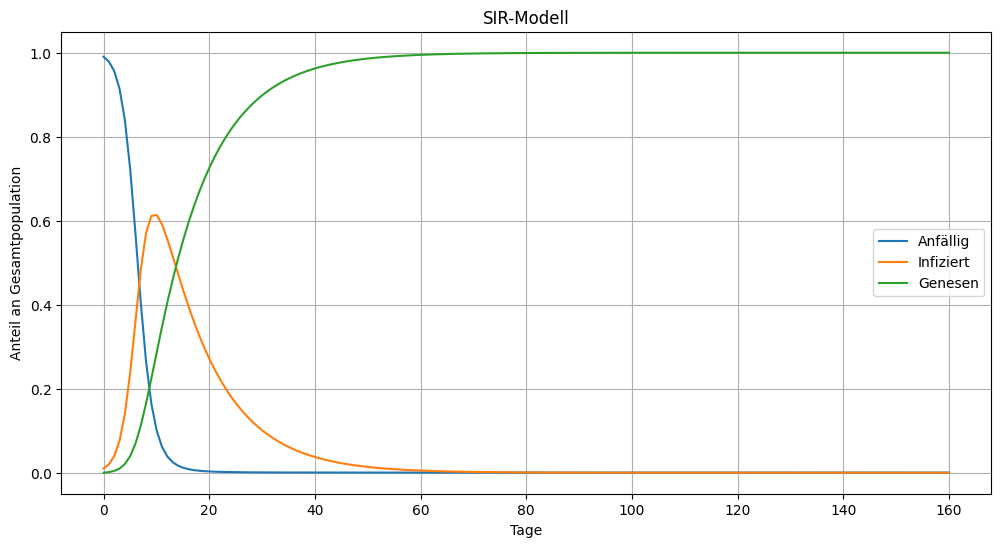

In [1]:
# run the cell
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# SIR model differential equations.
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * I * S
    dI_dt = beta * I * S - gamma * I
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt

######
# Initial number of infected and recovered individuals, everyone else is susceptible to infection initially.
S0 = 990
I0 = 10
R0 = 0
# Total population, N.
N = S0 + I0 + R0

# Initial conditions vector
y0 = S0/N, I0/N, R0/N

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = 0.8
gamma = 0.1

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# Integrate the SIR equations over the time grid, t.
solution = odeint(sir_model, y0, t, args=(beta, gamma))
solution = np.array(solution)

# Set plot style to dark background
#plt.style.use('dark_background')

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(figsize=(12, 6))
plt.plot(t, solution[:, 0], label='Anfällig')
plt.plot(t, solution[:, 1], label='Infiziert')
plt.plot(t, solution[:, 2], label='Genesen')
plt.title('SIR-Modell')
plt.xlabel('Tage')
plt.ylabel('Anteil an Gesamtpopulation')
plt.legend()

plt.grid('on')
plt.show()

### Übung 

Passe das Modell an, um verschiedene Szenarien zu simulieren. Verändere die Parameter β und γ und beobachte, wie sich die Dynamik der Epidemie ändert. 

    Wie verändert eine Erhöhung der Übertragungsrate β den Verlauf der Epidemie? Was passiert, wenn β verringert wird?
    Untersuche den Effekt einer erhöhten Genesungsrate γ auf die Dauer und Schwere der Epidemie.
    Simuliere ein Szenario, in dem die anfängliche Anzahl der Infizierten (I0) höher ist. Wie beeinflusst dies den Ausbruch und den Verlauf der Epidemie?

Verwende für Ihre Simulationen verschiedene Werte von β und γ, beginne beispielsweise mit folgenden Anpassungen:

    Erhöhung der Übertragungsrate β auf 1.0
    Erhöhung der Genesungsrate γ auf 0.2
    Verdoppelung der anfänglichen Anzahl der Infizierten I0 (Bei Verringerung der Anzahl Anfälliger)

Analysiere die Ergebnisse der Simulationen und diskutiere, wie Änderungen in den Parametern die Ausbreitung der Krankheit beeinflussen können. Nutze Plots, um Ergebnisse zu visualisieren.

Für die Experimente kann der obige Codeabschnitt ab ##### kopiert und in den folgenden Zellen angepasst werden. Dadurch lassen sich die Plots miteinander vergleichen.